In [1]:
import numpy as np

import matplotlib.pyplot as plt

import healpy as hp

import pathlib

import os

#retina matplotlib magic



In [2]:
import healpy as hp

In [28]:
import sys
sys.path.append('../itfgs/')

version = 'born'

from itfgs.params import SOn32 as SOB
from itfgs.params import SOn32Rand as SOBr
from itfgs.params import SOn32PostBorn as SOPB
from itfgs.params import SOn32PostBornRand as SOPBr


Caching sky fractions...
Caching sky fractions...
Caching sky fractions...
Caching sky fractions...
Caching sky fractions...
Caching sky fractions...


## CMB level plots

In [4]:
Simulationsdir = pathlib.Path(os.environ['SCRATCH'])/'SKYSIMS/GIULIOSIMS/'

In [27]:
keyB = 'NL Born'
keyBr = 'NL Born Rand'
keyPB = 'NL Post-Born'
keyPBr = 'NL Post-Born Rand'

In [48]:
SOdict = {keyB: SOB, keyPB: SOPB, keyBr: SOBr, keyPBr: SOPBr}

In [49]:
tlm_maps = {k: SO_.sims_cmb_len.get_sim_tlm(0) for k, SO_ in SOdict.items()}

In [50]:
cls_len = SOB.cls_len
cls_unl = SOB.cls_unl
tt = cls_len['tt']
pp = cls_unl['pp']

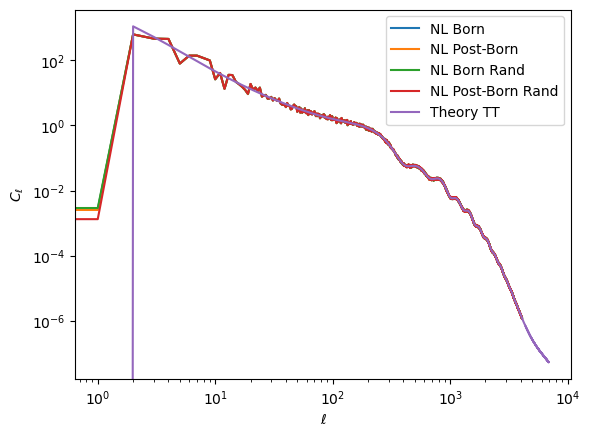

In [51]:
for k, tlm in tlm_maps.items():
    plt.loglog(hp.alm2cl(tlm), label = k)
plt.loglog(tt, label = 'Theory TT')
plt.ylabel(r'$C_\ell$')
plt.xlabel(r'$\ell$')
plt.legend()

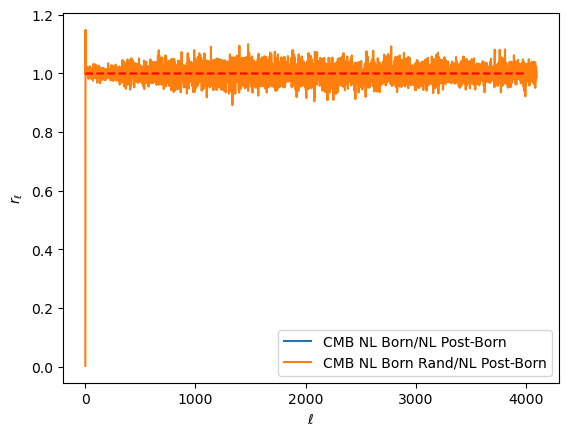

In [52]:
plt.plot(hp.alm2cl(tlm_maps[keyB])/hp.alm2cl(tlm_maps[keyPB]), label = f'CMB {keyB}/{keyPB}')

plt.plot(hp.alm2cl(tlm_maps[keyBr])/hp.alm2cl(tlm_maps[keyPB]), label = f'CMB {keyBr}/{keyPB}')
#plt.loglog(hp.alm2cl(tlm_maps[keyPBr])/hp.alm2cl(tlm_maps[keyPB]), label = f'CMB {keyPBr}/{keyPB}')


plt.plot(np.arange(0, 4000), np.ones(4000), 'r--')
plt.ylabel(r'$r_\ell$')
plt.xlabel(r'$\ell$')
plt.legend()

## Plot QE reconstruction

In [53]:
from plancklens.qcinv.util_alm import alm_copy as palm_copy

In [54]:
input_plm_maps = {k: SO_.sims_cmb_len.get_sim_plm(0) for k, SO_ in SOdict.items()}

In [55]:
from lenscarf.iterators import statics

plms_QE_dict = {k: np.load(f'{SO_.TEMP}/ptt_sim0000{version}/normalized_phi_plm_it000.npy') for k, SO_ in SOdict.items()}

p2k = np.arange(4001) * np.arange(1, 4002) * 0.5

In [56]:
plm_in_ins = {k: palm_copy(d, lmax = SOdict[k].lmax_phi) for k, d in input_plm_maps.items()} #GF input postborn + NL map
auto_in = {k: hp.alm2cl(plm_in) for k, plm_in in plm_in_ins.items()}

In [57]:
crosses_dict =  {k: hp.alm2cl(plms_QE_dict[k], plm_in) for k, plm_in in plm_in_ins.items()}

/tmp/ipykernel_13752/2903204442.py:2: RuntimeWarning: invalid value encountered in divide
  plt.loglog(auto_in[keyB]/auto_in[keyPB], label = f'Auto IN {keyB}/Auto IN {keyPB}')
/tmp/ipykernel_13752/2903204442.py:3: RuntimeWarning: invalid value encountered in divide
  plt.loglog(auto_in[keyBr]/auto_in[keyPB], label = f'Auto IN {keyBr}/Auto IN {keyPB}', ls = '--')
/tmp/ipykernel_13752/2903204442.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.loglog(auto/pp[:len(auto)], label = f'Auto IN {k}/pp th', alpha = 0.4, ls = '--')
/tmp/ipykernel_13752/2903204442.py:8: RuntimeWarning: invalid value encountered in divide
  plt.loglog(auto/pp[:len(auto)], label = f'Auto IN {k}/pp th', alpha = 0.4, ls = '--')


Text(0, 0.5, '$r_L$')

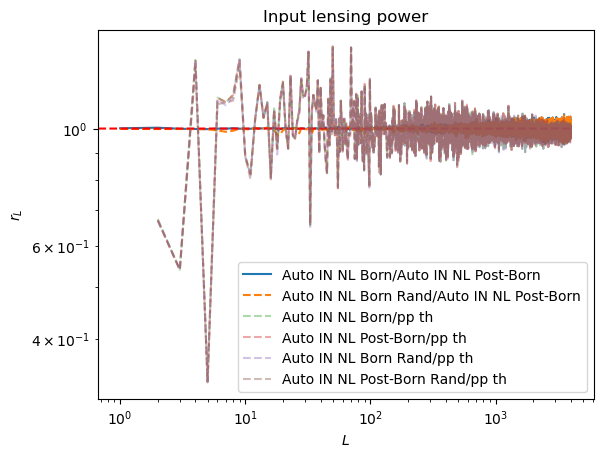

In [58]:
plt.title('Input lensing power')
plt.loglog(auto_in[keyB]/auto_in[keyPB], label = f'Auto IN {keyB}/Auto IN {keyPB}')
plt.loglog(auto_in[keyBr]/auto_in[keyPB], label = f'Auto IN {keyBr}/Auto IN {keyPB}', ls = '--')

plt.loglog(np.arange(0, 4000), np.ones(4000), 'r--')

for k, auto in auto_in.items():
    plt.loglog(auto/pp[:len(auto)], label = f'Auto IN {k}/pp th', alpha = 0.4, ls = '--')


plt.legend()

plt.xlabel(r'$L$')
plt.ylabel(r'$r_L$')

Text(0, 0.5, '$C_L$')

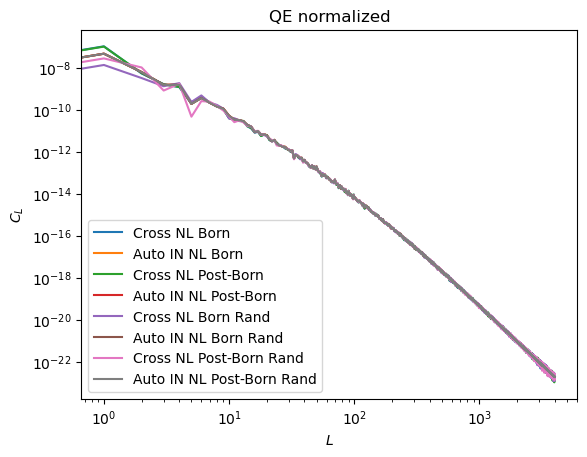

In [59]:
plt.title('QE normalized')

for k, autoin in auto_in.items():
    plt.loglog(crosses_dict[k], label = f'Cross {k}')
    plt.loglog(autoin, label = f'Auto IN {k}')

plt.legend()

plt.xlabel(r'$L$')
plt.ylabel(r'$C_L$')

In [60]:
auto =  {k: hp.alm2cl(plms, plms) for k, plms in plms_QE_dict.items()}

/tmp/ipykernel_13752/1341853639.py:3: RuntimeWarning: invalid value encountered in divide
  rho = {k: cross/np.sqrt(auto_in[k]*auto[k]) for k, cross in crosses_dict.items()}


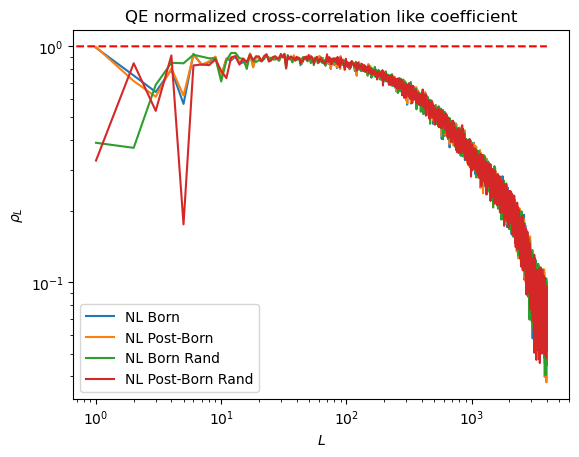

In [61]:
plt.title('QE normalized cross-correlation like coefficient')

rho = {k: cross/np.sqrt(auto_in[k]*auto[k]) for k, cross in crosses_dict.items()}


for k, rho in rho.items():
    plt.loglog(rho, label = f'{k}')

plt.loglog(np.arange(0, 4000), np.ones(4000), 'r--')

plt.xlabel(r'$L$')
plt.ylabel(r'$\rho_L$')

plt.legend()

## Iterative Reconstruction

In [62]:
from lenscarf.iterators import statics

In [63]:
iters = [0, 1]

In [64]:
plms_dict = {k: statics.rec.load_plms(f'{SO_.TEMP}/ptt_sim0000{version}', iters) for k, SO_ in SOdict.items()}


/tmp/ipykernel_13752/1706209759.py:15: RuntimeWarning: invalid value encountered in divide
  rhos_list = [c_/np.sqrt(a_*auto_in_temp) for c_, a_ in zip(cs_, as_)]


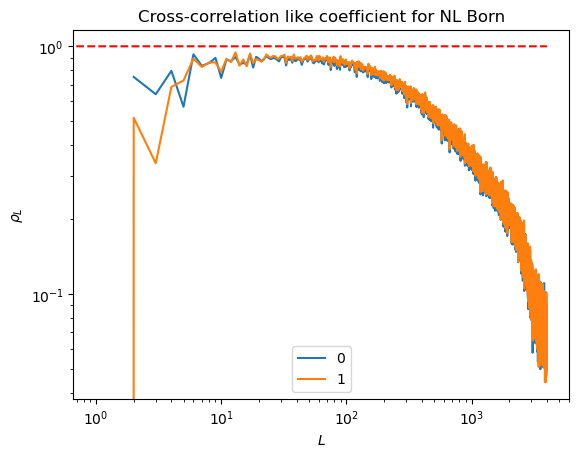

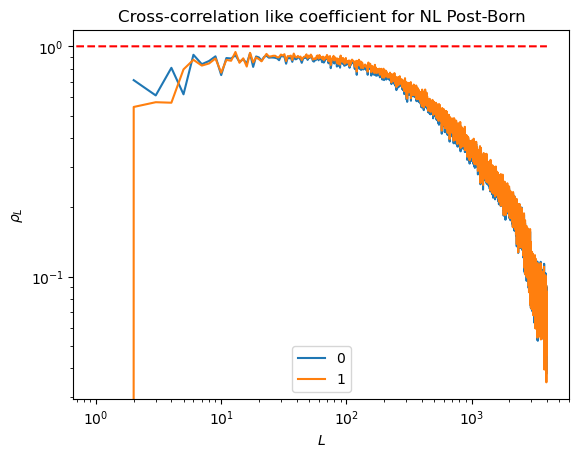

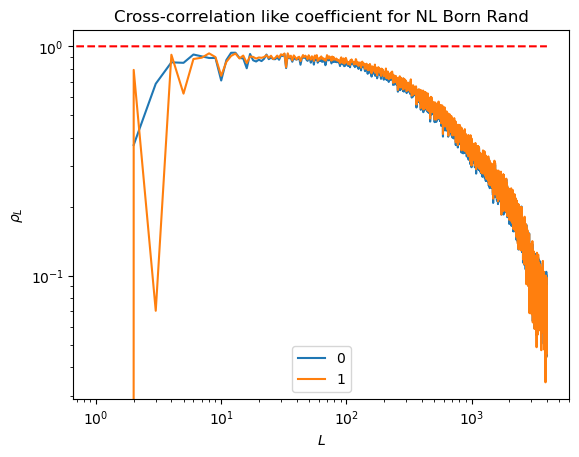

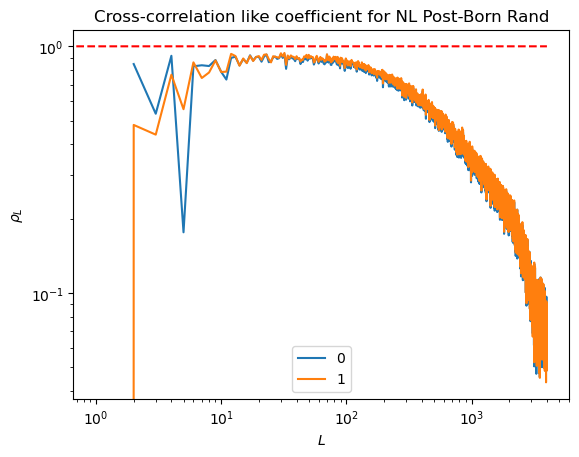

In [65]:
rho_iters_dict = {}
crosses_dict = {}
autos_dict = {}
autos_in_dict = {}

for k, plms in plms_dict.items():
    auto_in_temp = auto_in[k]
    cs_ = [hp.alm2cl(plm_, plm_in_ins[k]) for plm_ in plms]
    as_ = [hp.alm2cl(plm_) for plm_ in plms]
    
    crosses_dict[k] = cs_
    autos_dict[k] = as_
    autos_in_dict[k] = auto_in_temp

    rhos_list = [c_/np.sqrt(a_*auto_in_temp) for c_, a_ in zip(cs_, as_)]
    rho_iters_dict[k] = rhos_list

colors = []
for k, rhos in rho_iters_dict.items():
    plt.title(f'Cross-correlation like coefficient for {k}')
    [plt.loglog(rho, label = f'{i}') for i, rho in enumerate(rhos)]
    plt.xlabel(r'$L$')
    plt.ylabel(r'$\rho_L$')
    plt.legend()
    plt.loglog(np.arange(0, 4000), np.ones(4000), 'r--')
    plt.show()

## Check Normalization

In [ ]:
theoryNorm = 

In [ ]:
norms = {}


In [ ]:
rho_iters_dict = {}
crosses_dict = {}
autos_dict = {}
autos_in_dict = {}